In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.chdir("/content/gdrive/My Drive/OwnJupyterNotebooks/")
os.getcwd()

'/content/gdrive/My Drive/OwnJupyterNotebooks'

In [0]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline


## Reading in Data for Confirmed Exoplanets

In [4]:
data = pd.read_csv("/content/gdrive/My Drive/OwnJupyterNotebooks/Exoplanets2.csv")
data.head()

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,...,pl_ttvflag,pl_kepflag,pl_k2flag,ra_str,dec_str,ra,st_raerr,dec,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility
0,Kepler-163,b,Kepler-163 b,Transit,0,2,7.810937,0.000107,-0.000107,0.0,3,0.078,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.094,0.039,-0.039,0.0,3,NaN,NaN,NaN,...,0,1,0,19h40m00.68s,+46d59m14.4s,295.002819,0.000019,46.987328,0.000017,2,703.69,10.19,-10.19,0.0,3,14.415,NaN,0.0,Kepler-band,14.380,NaN,0.0,5776.0,200.0,-200.0,0.0,6,NaN,NaN,NaN,NaN,2,0.92,0.38,-0.38,0.0,6,1,2014-05-14,Kepler
1,Kepler-163,c,Kepler-163 c,Transit,0,2,21.347262,0.000081,-0.000081,0.0,4,0.152,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.202,0.084,-0.084,0.0,3,NaN,NaN,NaN,...,0,1,0,19h40m00.68s,+46d59m14.4s,295.002819,0.000019,46.987328,0.000017,2,703.69,10.19,-10.19,0.0,3,14.415,NaN,0.0,Kepler-band,14.380,NaN,0.0,5776.0,200.0,-200.0,0.0,6,NaN,NaN,NaN,NaN,2,0.92,0.38,-0.38,0.0,6,1,2014-05-14,Kepler
2,Kepler-164,b,Kepler-164 b,Transit,0,3,5.035030,0.000027,-0.000027,0.0,3,0.058,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.126,0.025,-0.025,0.0,3,NaN,NaN,NaN,...,0,1,0,19h11m07.40s,+47d37m47.7s,287.780828,0.000019,47.629913,0.000017,2,914.18,14.09,-14.09,0.0,3,14.282,NaN,0.0,Kepler-band,14.233,NaN,0.0,5888.0,113.0,-113.0,0.0,6,NaN,NaN,NaN,NaN,2,1.15,0.22,-0.22,0.0,6,1,2014-05-14,Kepler
3,Kepler-164,c,Kepler-164 c,Transit,0,3,10.945723,0.000029,-0.000029,0.0,4,0.097,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.244,0.046,-0.046,0.0,3,NaN,NaN,NaN,...,0,1,0,19h11m07.40s,+47d37m47.7s,287.780828,0.000019,47.629913,0.000017,2,914.18,14.09,-14.09,0.0,3,14.282,NaN,0.0,Kepler-band,14.233,NaN,0.0,5888.0,113.0,-113.0,0.0,6,NaN,NaN,NaN,NaN,2,1.15,0.22,-0.22,0.0,6,1,2014-05-14,Kepler
4,Kepler-164,d,Kepler-164 d,Transit,0,3,28.986769,0.000162,-0.000162,0.0,4,0.187,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,0.219,0.042,-0.042,0.0,3,NaN,NaN,NaN,...,0,1,0,19h11m07.40s,+47d37m47.7s,287.780828,0.000019,47.629913,0.000017,2,914.18,14.09,-14.09,0.0,3,14.282,NaN,0.0,Kepler-band,14.233,NaN,0.0,5888.0,113.0,-113.0,0.0,6,NaN,NaN,NaN,NaN,2,1.15,0.22,-0.22,0.0,6,1,2014-05-14,Kepler


In [5]:
data.shape

(4057, 82)

### Choosing Data to Explore

In [6]:
data1 = data[['pl_name','pl_pnum','pl_orbper','pl_orbsmax','pl_orbeccen','pl_orbincl','pl_bmassj','pl_radj','pl_dens','pl_ttvflag','st_dist','st_optmag','st_teff','st_mass','st_rad']]
data1.shape

(4057, 15)

In [7]:
#Changing column names to more easily understood
list_of_names = ['Name','Number of Planets in System','Orbit Time','Longest Elliptical Radius','Orbital Deviation','Angular Sightline Distance','Best Mass','Radius in Jupiters','Density','Orbit Time Disruption','Distance To','Host Star Brighness','Temperature','Mass','Radius in Suns']
data1.columns = list_of_names
data1.head()

,Name,Number of Planets in System,Orbit Time,Longest Elliptical Radius,Orbital Deviation,Angular Sightline Distance,Best Mass,Radius in Jupiters,Density,Orbit Time Disruption,Distance To,Host Star Brighness,Temperature,Mass,Radius in Suns
0,Kepler-163 b,2,7.810937,0.078,NaN,NaN,NaN,0.094,NaN,0,703.69,14.415,5776.0,NaN,0.92
1,Kepler-163 c,2,21.347262,0.152,NaN,NaN,NaN,0.202,NaN,0,703.69,14.415,5776.0,NaN,0.92
2,Kepler-164 b,3,5.035030,0.058,NaN,NaN,NaN,0.126,NaN,0,914.18,14.282,5888.0,NaN,1.15
3,Kepler-164 c,3,10.945723,0.097,NaN,NaN,NaN,0.244,NaN,0,914.18,14.282,5888.0,NaN,1.15
4,Kepler-164 d,3,28.986769,0.187,NaN,NaN,NaN,0.219,NaN,0,914.18,14.282,5888.0,NaN,1.15


### Column name descriptions:

**Name**: Planet name most commonly used in the literature. <br>
**Number of Planets in System**: Number of planets in the planetary system.<br>
**Orbit Time**: Time the planet takes to make a complete orbit around the host star or system.<br>
**Longest Elliptical Radius**: The longest radius of an elliptic orbit, or, for exoplanets detected via gravitational microlensing or direct imaging, the projected separation in the plane of the sky.<br>
**Orbital Deviation**: Amount by which the orbit of the planet deviates from a perfect circle.<br>
**Angular Sightline Distance**: Angular distance of the orbital plane from the line of sight.<br>
**Best Mass**: Best planet mass estimate available, in order of preference: Mass, M*sin(i)/sin(i), or M*sin(i), depending on availability, and measured in Jupiter masses. <br>
**Radius in Jupiters**: Length of a line segment from the center of the planet to its surface, measured in units of radius of Jupiter.<br>
**Density**: Amount of mass per unit of volume of the planet.<br>
**Orbit Time Disruption**: Flag indicating if the planet orbit exhibits transit timing variations from another planet in the system (1=yes, 0=no).

Note: Non-transiting planets discovered via the transit timing variations of another planet in the system will not have their TTV flag set, since they do not themselves demonstrate TTVs.<br>
**Distance To**: Distance to the planetary system in units of parsecs.<br>
**Host Star Brightness**: Brightness of the host star as measured using the V (Johnson) or the Kepler-band in units of magnitudes.<br>
**Temperature**: Temperature of the star as modeled by a black body emitting the same total amount of electromagnetic radiation.<br>
**Mass**:  Amount of matter contained in the star, measured in units of masses of the Sun.<br>
**Radius in Suns**: Length of a line segment from the center of the star to its surface, measured in units of radius of the Sun.<br>
<br>
Descriptions taken from https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html.

In [8]:
data1.head()

,Name,Number of Planets in System,Orbit Time,Longest Elliptical Radius,Orbital Deviation,Angular Sightline Distance,Best Mass,Radius in Jupiters,Density,Orbit Time Disruption,Distance To,Host Star Brighness,Temperature,Mass,Radius in Suns
0,Kepler-163 b,2,7.810937,0.078,NaN,NaN,NaN,0.094,NaN,0,703.69,14.415,5776.0,NaN,0.92
1,Kepler-163 c,2,21.347262,0.152,NaN,NaN,NaN,0.202,NaN,0,703.69,14.415,5776.0,NaN,0.92
2,Kepler-164 b,3,5.035030,0.058,NaN,NaN,NaN,0.126,NaN,0,914.18,14.282,5888.0,NaN,1.15
3,Kepler-164 c,3,10.945723,0.097,NaN,NaN,NaN,0.244,NaN,0,914.18,14.282,5888.0,NaN,1.15
4,Kepler-164 d,3,28.986769,0.187,NaN,NaN,NaN,0.219,NaN,0,914.18,14.282,5888.0,NaN,1.15


In [9]:
data1.describe()

,Number of Planets in System,Orbit Time,Longest Elliptical Radius,Orbital Deviation,Angular Sightline Distance,Best Mass,Radius in Jupiters,Density,Orbit Time Disruption,Distance To,Host Star Brighness,Temperature,Mass,Radius in Suns
count,4057.000000,3.943000e+03,2379.000000,1384.000000,852.000000,1616.000000,3144.000000,484.000000,4057.000000,4051.000000,3869.000000,3839.000000,3292.000000,3718.000000
mean,1.774957,2.314676e+03,6.605953,0.161466,86.236384,2.510343,0.375701,2.552329,0.075179,637.127176,12.703164,5495.674064,1.005213,1.542622
std,1.160189,1.166278e+05,80.580400,0.188744,8.376459,4.408836,0.427361,5.196367,0.263712,826.476814,2.960943,1762.993855,0.651809,3.711946
min,1.000000,9.070629e-02,0.004400,0.000000,7.700000,0.000060,0.030000,0.030000,0.000000,1.300000,0.850000,575.000000,0.010000,0.010000
25%,1.000000,4.485229e+00,0.057000,0.014900,86.192500,0.089957,0.140000,0.411000,0.000000,158.390000,11.492000,5026.500000,0.810000,0.800000
50%,1.000000,1.184820e+01,0.118000,0.100000,88.100000,0.864000,0.208000,0.993500,0.000000,481.000000,13.701000,5600.000000,0.970000,0.970000
75%,2.000000,4.217169e+01,0.680000,0.230000,89.272500,2.540000,0.319000,2.600000,0.000000,867.000000,14.915000,5923.000000,1.130000,1.260000
max,8.000000,7.300000e+06,2500.000000,0.950000,133.000000,55.590000,6.900000,77.700000,1.000000,8500.000000,20.150000,57000.000000,23.560000,71.230000


### How many planets are in the planetary systems?

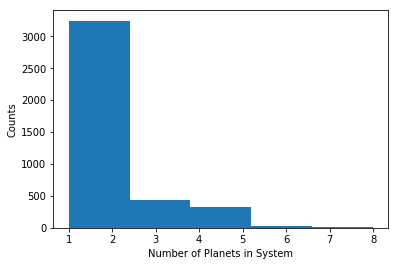

In [20]:
# How many planets are in the planetary systems?
plt.hist(data1['Number of Planets in System'], bins=5)
plt.ylabel('Counts')
plt.xlabel('Number of Planets in System')
plt.show()

#### The data are right skewed.

In [11]:
data1['Radius in Suns'].value_counts()

0.89     65
0.94     63
0.79     61
0.90     59
0.84     59
0.93     59
0.96     58
0.86     58
0.80     56
0.78     55
0.81     54
0.91     52
0.83     52
0.95     50
0.76     49
0.87     49
0.85     47
1.00     46
0.92     45
1.02     45
1.05     45
1.11     43
0.82     43
0.72     42
0.88     42
1.03     42
0.74     42
1.04     41
1.09     41
1.01     40
         ..
14.70     1
21.40     1
20.90     1
5.13      1
22.03     1
4.44      1
16.21     1
10.06     1
9.09      1
5.77      1
3.82      1
4.60      1
32.35     1
2.58      1
4.67      1
21.66     1
0.23      1
6.26      1
10.33     1
2.69      1
2.97      1
4.96      1
8.80      1
0.01      1
3.39      1
2.90      1
45.10     1
5.26      1
4.63      1
12.40     1
Name: Radius in Suns, Length: 362, dtype: int64

### What About Planetary Size?

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.684e+03, 1.700e+01, 8.000e+00, 6.000e+00, 3.000e+00]),
 array([1.0000e-02, 1.4254e+01, 2.8498e+01, 4.2742e+01, 5.6986e+01,
        7.1230e+01]),
 <a list of 5 Patch objects>)

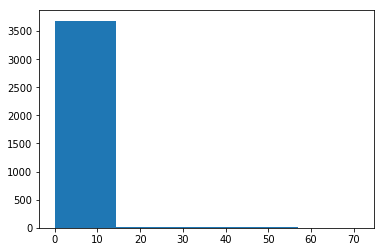

In [12]:
#What about planetary size?
plt.hist(data1['Radius in Suns'],bins=5)

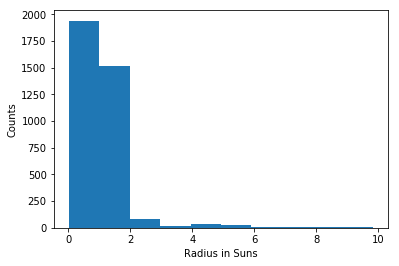

In [19]:
data2 = data1[data1['Radius in Suns']< 10] 
plt.hist(data2['Radius in Suns'], bins=10)
plt.ylabel('Counts')
plt.xlabel('Radius in Suns')
plt.show()

#### Most earthlike exoplanets are 2 radii of suns or lower.

### How Long Are Orbits Around Their Suns?

In [14]:
data1['Orbit Time'].value_counts()

5000.000000     2
428.500000      2
872.200000      2
4100.000000     2
19.129473       1
20.505870       1
144.547396      1
27000.000000    1
13.781300       1
963.600000      1
11.419412       1
124.524465      1
192.900000      1
2.052350        1
7.751925        1
2.455239        1
2.033879        1
7.384490        1
352.200000      1
396.030000      1
257.800000      1
7.340711        1
256.200000      1
138.944200      1
433.800000      1
360.200000      1
31.884000       1
379.630000      1
7.812540        1
17.670064       1
               ..
2.032046        1
34.060467       1
13.522511       1
88.900000       1
1311.000000     1
18.870641       1
53.578637       1
8.406726        1
258.800000      1
22.085576       1
6.739724        1
6.521211        1
7.149210        1
120.800000      1
17.934937       1
3.212220        1
4.786949        1
3.308958        1
114.736350      1
214.311416      1
5.082747        1
19.118775       1
2.744325        1
11.046034       1
2.344512  

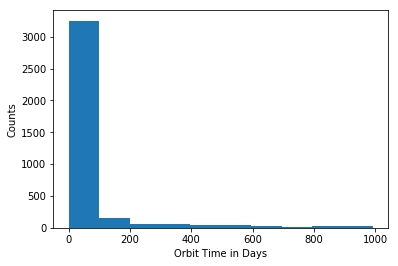

In [18]:
# How Long Are Orbits Around Their Suns?
data3 = data1[data1['Orbit Time'] < 1000]
plt.hist(data3['Orbit Time'])
plt.ylabel('Counts')
plt.xlabel('Orbit Time in Days')
plt.show()

#### Most exoplanets have orbit times 200 days or lower.

### What About Exoplanet Mass?

In [16]:
# What about exoplanet mass?
data1['Mass'].value_counts() # Units are masses of the sun

0.94     85
0.96     73
0.93     68
1.00     66
0.95     66
1.04     62
1.01     59
1.08     59
0.98     58
0.81     58
0.90     56
0.87     55
0.99     53
1.02     53
0.97     52
1.03     51
1.06     51
1.09     49
0.80     48
0.92     47
0.86     47
0.91     47
1.10     46
0.88     45
0.84     45
1.05     45
1.07     43
0.85     42
1.11     41
0.89     40
         ..
2.13      1
0.17      1
1.97      1
3.50      1
23.56     1
1.80      1
3.09      1
1.92      1
3.70      1
6.73      1
2.42      1
2.60      1
2.49      1
4.26      1
2.53      1
0.20      1
2.22      1
9.06      1
2.77      1
2.65      1
1.65      1
1.79      1
0.05      1
0.24      1
1.89      1
2.56      1
2.12      1
2.39      1
1.98      1
1.94      1
Name: Mass, Length: 226, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show>

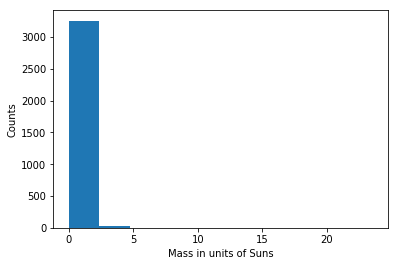

In [17]:
plt.hist(data1['Mass'])
plt.ylabel('Counts')
plt.xlabel("Mass in units of Suns")
plt.show